In [24]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set(color_codes=True)
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
import warnings
warnings.filterwarnings("ignore")

#### Load the Dataset

In [25]:
df= pd.read_csv(r"/Users/rawanalaufi/Documents/students.csv")

#### Show the first 5 rows

In [26]:
df.head()

,Density,Dielectric Constant,Loss Factor
0,0.749,2.05,0.016
1,0.798,2.15,0.020
2,0.849,2.25,0.022
3,0.877,2.30,0.023
4,0.929,2.40,0.026


### Scatter diagrams to perform a quick linearity check

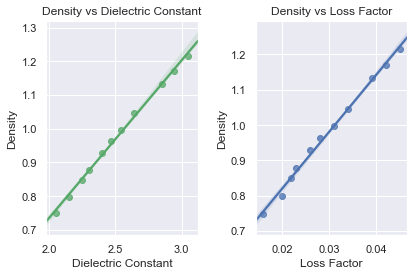

In [27]:
#the linearity check between Dielectric Constant and Density
plt.subplot(1, 2, 1)
ax2 = sns.regplot(df['Dielectric Constant'],df['Density'], color="g")
plt.title('Density vs Dielectric Constant')

#the linearity check between Loss Factor and Density
plt.subplot(1, 2, 2)
ax1 = sns.regplot(df['Loss Factor'],df['Density'])
plt.title('Density vs Loss Factor')
plt.tight_layout()


plt.show()


#### Explanatory variables 

In [28]:
x= df[['Dielectric Constant','Loss Factor']]

#### Response variable 

In [29]:
y= df[['Density']]

### Multiple Linear Regression

In [30]:
#Create linear regression object
regr = LinearRegression()
regr.fit(x, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [31]:
#To retrieve the intercept:
print('Intercept: \n', regr.intercept_)
#To retrieve the slope:
print('Coefficients: \n', regr.coef_)

Intercept: 
 [-0.11049859]
Coefficients: 
 [[0.4071739  2.10796936]]


#### Use the model to predict the density when the dielectric constant is 2.5 and the loss factor is 0.03.

In [32]:
print ('Predicted density : \n', regr.predict([[2.5 ,0.03]]))

Predicted density : 
 [[0.97067523]]


#### Estimate the variance and the standard errors of the regression coefficients. 
unfortunately linear regresion object in sklearn doesn't have the summary method, so statsmodels used [1](#references_cell)

In [33]:
#Linear regression, also called Ordinary Least-Squares (OLS) Regression
model = sm.OLS(y, x).fit()
print_model = model.summary()

In [34]:
print_model

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Density   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 7.524e+04
Date:                Fri, 22 Nov 2019   Prob (F-statistic):           9.89e-20
Time:                        14:23:15   Log-Likelihood:                 38.031
No. Observations:                  11   AIC:                            -72.06
Df Residuals:                       9   BIC:                            -71.27
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Dielectric Constant     0.3329      0.006     56.697      0.000       0.320       0.346
Loss Factor             4.6761      0.480      9.743      0.000       3.590       5.762
==============================================================================
Omnibus:                        3.355   Durbin-Watson:                   0.440
Prob(Omnibus):                  0.187   Jarque-Bera (JB):                1.111
Skew:                          -0.208   Prob(JB):                        0.574
Kurtosis:                       1.500   Cond. No.                         478.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<a id='references_cell'> </a>
<h3>References</h3>
<a herf='https://stackoverflow.com/questions/26319259/how-to-get-a-regression-summary-in-python-scikit-like-r-does'>1.How to get a regression summary in Python scikit like R does?</a> 